In [11]:
import tensorflow as tf
from tensorflow import keras as kr

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from PIL import Image
import struct

#import TensorBoard

tf.__version__,tf.keras.__version__

('2.3.0', '2.4.0')

In [12]:
IMAGE_TR_FILE_NAME='./dataset/train-images.idx3-ubyte'
LABEL_TR_FILE_NAME='./dataset/train-labels.idx1-ubyte'

IMAGE_TS_FILE_NAME='./dataset/t10k-images.idx3-ubyte'
LABEL_TS_FILE_NAME='./dataset/t10k-labels.idx1-ubyte'

def load_images(file_name):
    binfile=open(file_name,'rb')
    buffers=binfile.read()
    magic, num, rows, cols = struct.unpack_from('>IIII', buffers, 0)
    bits = num * rows * cols
    images = struct.unpack_from('>' + str(bits) + 'B', buffers, struct.calcsize('>IIII'))
    binfile.close()
    images = np.reshape(images, [num, rows * cols])
    return images

def load_labels(file_name):
    binfile = open(file_name, 'rb')
    buffers = binfile.read()
    magic,num = struct.unpack_from('>II', buffers, 0) 
    labels = struct.unpack_from('>' + str(num) + "B", buffers, struct.calcsize('>II'))
    binfile.close()
    labels = np.reshape(labels, [num])
    return labels  

def showImage(buffer,index=1):
    p=plt.subplot(10,10,index)
    p.imshow(buffer, cmap = matplotlib.cm.binary, interpolation="nearest")
    p.axis("off")
    plt.ion()
    plt.show()
    plt.pause(1)

In [13]:
train_x=load_images(IMAGE_TR_FILE_NAME).reshape((60000,28,28))
train_y=load_labels(LABEL_TR_FILE_NAME)

test_x=load_images(IMAGE_TS_FILE_NAME).reshape((10000,28,28))
test_y=load_labels(LABEL_TS_FILE_NAME)

train_x.shape,train_y.shape,test_x.shape,test_y.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [14]:
X_train, X_test=tf.cast(train_x/255.0, tf.float32), tf.cast(test_x/255.0, tf.float32)
Y_train, Y_test=tf.cast(train_y,tf.int16), tf.cast(test_y, tf.int16)
type(X_train)
print(Y_test)

tf.Tensor([7 2 1 ... 4 5 6], shape=(10000,), dtype=int16)


In [15]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
#model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='sigmoid'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))
model.summary()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.fit(X_train, Y_train, batch_size=64, epochs=10, validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 2s 2ms/step - loss: 0.5330 - sparse_categorical_accuracy: 0.8691 - val_loss: 0.2766 - val_sparse_categorical_accuracy: 0.9237
Epoch 2/10
750/750 [==============================] - 1s 2ms/step - loss: 0.2557 - sparse_categorical_accuracy: 0.9276 - val_loss: 0.2156 - val_sparse_categorical_accuracy: 0.9410
Epoch 3/10
750/750 [==============================] - 1s 2ms/step - loss: 0.2001 - sparse_categorical_accuracy: 0.9422 - val_loss: 0.1764 - val_sparse_categorical_accuracy: 0.9519
Epoch 4/10
750/750 [==============================] - 2s 2ms/step - loss: 0.1644 - sparse_categorical_accuracy: 0.9531 - val_loss: 0.1568 - val_sparse_categorical_accuracy: 0.9556
Epoch 5/10
750/750 [==============================] - 2s 2ms/step - loss: 0.1376 - sparse_categorical_accuracy: 0.9605 - val_loss: 0.1392 - val_sparse_categorical_accuracy: 0.9604
Epoch 6/10
750/750 [==============================] - 2s 2ms/step - loss: 0.1179 - sparse_categorica

In [17]:
model.evaluate(X_test, Y_test, verbose=2)

313/313 - 0s - loss: 0.0937 - sparse_categorical_accuracy: 0.9718


[0.0937095358967781, 0.9718000292778015]

In [18]:
model.save('./model/my_mnist_linear',overwrite=True, save_format='tf',include_optimizer=True)
#model.save_weights('./model/my_mnist_linear', overwrite=True, save_format='tf')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ./model/my_mnist_linear\assets


[7 2 1 ... 4 5 6]


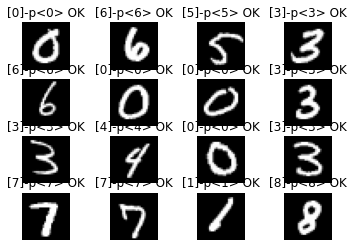

In [19]:
pred=np.argmax(model.predict(X_test), axis=1)
print(pred)

for i in range(16):
    n=np.random.randint(1,10000)
    plt.subplot(4,4,i+1)
    plt.axis("off")
    plt.imshow(test_x[n], cmap='gray')
    if(test_y[n]==pred[n]):
        res="OK"
    else:
        res="NG"
    plt.title("[%d]-p<%d> %s" %(test_y[n], pred[n],res))
plt.show()

In [20]:
lmodel=kr.models.load_model('./model/my_mnist_linear')
#model.load_weights('./model/my_mnist_linear')
lmodel.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
